# Модуль В. Обработка и анализ текстовых данных (Инвариант)

## Задание

**Краткое описание задания:**

1. Выполнить парсинг данных для сбора информации с указанных веб-ресурсов;

2. Формирование структуры набора данных;

3. Провести предварительную обработку данных;

4. Выполнить построение и отбор признаков;

5. Выполнить семантический анализ текста.

6. Провести визуальный анализ статистики текстовых признаков

7. Сделать выводы, в том числе с использованием инструментов визуализации.

**Цель:** выполнить парсинг данных для сбора информации с указанных веб-ресурсов, провести предварительную обработку данных, построение и отбор признаков, семантический анализ текста и визуальный анализ статистики текстовых признаков. Сделать выводы, в том числе с использованием инструментов визуализации.

**Подробное описание выполнения задачи:**

1. Парсинг данных: сбор информации с веб-ресурсов, связанных с добычей нефти и газа.

2. Формирование структуры набора данных: определение необходимых полей и создайте структуры набора данных

3. Предварительная обработка данных: очистка данных от HTML-тегов, специальных символов и лишних пробелов и предварительная обработка.

4. Построение и отбор признаков: создайте числовые признаки на основе текстовых данных: количество слов, символов, заспамленность и др.

5. Визуальный анализ статистики текстовых признаков: постройте гистограммы и диаграммы распределения текстовых признаков.

6. Формулирование выводов и визуализация: сформулируйте выводы на основе проведенного анализа, подготовьте отчёт с результатами.

Построенная информационно-аналитическая система должна предусматривать методы защиты данных, описаны требования к программному обеспечению для работы с данными.

**Результат модуля:**

1. Таблица в формате xlsx с классом навыков, его содержанием и частотой встречаемости.

2. Аналитическая записка в формате docx с основными выводами

# 1. Парсинг данных

Сбор информации с веб-ресурсов, связанных с добычей нефти и газа. Было принято решение выбрать сайт hh.ru, т.к. у этого сайта есть удобное API для парсинга данных с этого сайта, а также на этом сайте самое большое колиество вакансий связанных с нефтью или газом среди остальных рускоязычных сайтов по вакансиям.

Для начала спарсим все страницы с вакансиями, которые содержут в названии нефть или газ.

In [77]:
# Отключение предупреждений
import warnings
warnings.filterwarnings("ignore")

In [45]:
import requests
import json
import os
import time

# Создаём папку в корне для удобной работы с файлами
if not os.path.exists('./docs'):
    os.makedirs('./docs')

# Создаём папку в docs для удобной работы с файлами (страницы)
if not os.path.exists('./docs/pagination_s'):
    os.makedirs('./docs/pagination_s')

def getPage(page=0):
    """
    Создаем метод для получения страницы со списком вакансий.
    Аргументы:
        page - Индекс страницы, начинается с 0. Значение по умолчанию 0, т.е. первая страница
    """
    
    # Справочник для параметров GET-запроса
    params = {
        'text': 'NAME:(нефть OR газ)', # Текст фильтра. В имени должно быть слово "нефть" или "газ"
        'page': page, # Индекс страницы поиска на HH
        'per_page': 100 # Кол-во вакансий на 1 странице
    }
    
    req = requests.get('https://api.hh.ru/vacancies', params=params) # Посылаем запрос к API
    data = req.content.decode() # Декодируем его ответ, чтобы Кириллица отображалась корректно
    req.close()
    return data

# Считываем первые 5000 вакансий
for page in range(0, 50):
    
    # Преобразуем текст ответа запроса в справочник Python
    jsObj = json.loads(getPage(page))
    
    # Сохраняем файлы в папку {путь до текущего документа со скриптом}\docs\pagination
    # Определяем количество файлов в папке для сохранения документа с ответом запроса
    # Полученное значение используем для формирования имени документа
    nextFileName = './docs/pagination_s/{}.json'.format(len(os.listdir('./docs/pagination_s')))
    
    # Создаем новый документ, записываем в него ответ запроса, после закрываем
    with open(nextFileName, mode='w', encoding='utf8') as f:
        f.write(json.dumps(jsObj, ensure_ascii=False))
    
    # Проверка на последнюю страницу, если вакансий меньше 5000
    if (jsObj['pages'] - page) <= 1:
        break
    
    # Необязательная задержка, но чтобы не нагружать сервисы hh, оставим. 0.25 сек мы может подождать
    time.sleep(0.25)
    
print('Страницы поиска собраны')

Страницы поиска собраны


После сбора страниц, в каждой странице ищем вакансии.

In [46]:
# Создаём папку в docs для удобной работы с файлами (вакансии)
if not os.path.exists('./docs/vacancies_s'):
    os.makedirs('./docs/vacancies_s')
    
# Получаем перечень ранее созданных файлов со списком вакансий и проходимся по нему в цикле 
for fl in os.listdir('./docs/pagination_s'):
    
    # Открываем файл, читаем его содержимое, закрываем файл
    with open('./docs/pagination_s/{}'.format(fl), encoding='utf8') as f:
        jsonText = f.read()
    
    # Преобразуем полученный текст в объект справочника
    jsonObj = json.loads(jsonText)
    
    # Получаем и проходимся по непосредственно списку вакансий
    for v in jsonObj['items']:
        
        # Обращаемся к API и получаем детальную информацию по конкретной вакансии
        req = requests.get(v['url'])
        data = req.content.decode()
        req.close()
        
        # Создаем файл в формате json с идентификатором вакансии в качестве названия
        # Записываем в него ответ запроса и закрываем файл
        fileName = './docs/vacancies_s/{}.json'.format(v['id'])
        with open(fileName, mode='w', encoding='utf8') as f:
            f.write(data)
        
        time.sleep(0.25)
        
print('Вакансии собраны')

Вакансии собраны


После сбора вакансий нужно удалить те файлы, у которых весь меньше чем 2КБ, т.к. в этих файлах нет данных, из-за того что при частых запросах потребовалась captcha.

In [48]:
# Метод для удаления файлов, которые запрашивают captcha.
def delete_files_smaller_than_2kb(folder_path):
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path) and os.path.getsize(file_path) < 2 * 1024:
            os.remove(file_path)

# Используем наш метод
delete_files_smaller_than_2kb('./docs/vacancies_s')

In [49]:
cnt_docs = len(os.listdir('./docs/vacancies_s'))
print(cnt_docs)

763


Таких файлов не оказалось, было 763, столько же и осталось, отлично.

Теперь нужно из каждой вакансии найти данные по ней.

In [18]:
import requests
import json
import os
import time
import pandas as pd

# Модули для отчистки и вывода информации
from IPython.display import clear_output
from IPython.display import display

IDs = [] # Список идентификаторов вакансий
names = [] # Список наименований вакансий
descriptions = [] # Список описаний вакансий
experience = [] # Список требуемого опыта вакансий
company_name = [] # Список компаний вакансий
skills_vac = [] # Список идентификаторов вакансий
skills_name = [] # Список названий навыков
schedule_day = [] # Список графика работы вакансий
address = [] # Список городов вакансий
salary = [] # Список зарплат (от) вакансий
date_public = [] # Список дат публикации вакансий

# В выводе будем отображать прогресс
# Для этого узнаем общее количество файлов, которые надо обработать
# Счетчик обработанных файлов установим в ноль
cnt_docs = len(os.listdir('./docs/vacancies_s'))
i = 0

# Проходимся по всем файлам в папке vacancies
for fl in os.listdir('./docs/vacancies_s'):
    
    # Открываем, читаем и закрываем файл
    f = open('./docs/vacancies_s/{}'.format(fl), encoding='utf8')
    jsonText = f.read()
    f.close()
    
    # Текст файла переводим в справочник
    jsonObj = json.loads(jsonText)
    
    # Заполняем списки
    IDs.append(jsonObj['id'])
    names.append(jsonObj['name'])
    descriptions.append(jsonObj['description'])
    schedule_day.append(jsonObj['schedule']['name'])
    experience.append(jsonObj['experience']['name'])
    
    if(jsonObj['department'] == None):
        company_name.append(None)
    else:
        company_name.append(jsonObj['department']['name'])
    
    if (jsonObj['salary'] == None):
        salary.append(None)
    else:
        salary.append(jsonObj['salary']['from'])

    # Т.к. был выбран первый регион, зададим автоматом регион московская область
    # Остальные регионы будут взяты со второго способа
    address.append("Москва")
    
    date_public.append(jsonObj['published_at'])
    
    # Т.к. навыки хранятся в виде массива, то проходимся по нему циклом
    skills_oner = []
    if len(jsonObj['key_skills']) == 0:
        skills_name.append("Не указано")
    else: 
        for skl in jsonObj['key_skills']:
            skills_oner.append(skl['name'])
            
        skills_string = '; '.join(skills_oner)
        skills_name.append(skills_string)
    
    # Увеличиваем счетчик обработанных файлов на 1, очищаем вывод ячейки и выводим прогресс
    i += 1
    clear_output(wait=True)
    display('Готово {} из {}'.format(i, cnt_docs))

'Готово 763 из 763'

Списки с данными по вакансиям сформированы, теперь можно приступать к формированию структуры набора данных.

# 2. Формирование структуры набора данных

In [49]:
df = pd.DataFrame({'id': IDs, 'company': company_name, 'name': names, 'description': descriptions, 'skills': skills_name, 'date_public': date_public, 'schedule': schedule_day, 'region': address, 'experience': experience, 'salary': salary})

Получился набор данных с вакансиями, которые как-то связаны с нефтью/газом.

Структура набора данных сформирована с полями:

- id: ID вакансии
- company: Компания
- name: Название вакансии
- description: Описание вакансии
- skills: Ключевые навыки
- date_public: Дата публикации
- schedule: График работы
- region: Регион
- experience: Опыт работы
- salary: Заработная плата

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           763 non-null    object 
 1   company      5 non-null      object 
 2   name         763 non-null    object 
 3   description  763 non-null    object 
 4   skills       763 non-null    object 
 5   date_public  763 non-null    object 
 6   schedule     763 non-null    object 
 7   region       763 non-null    object 
 8   experience   763 non-null    object 
 9   salary       511 non-null    float64
dtypes: float64(1), object(9)
memory usage: 59.7+ KB


In [6]:
df.head(100)

,id,company,name,description,skills,date_public,schedule,region,experience,salary
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,<p>Обязанности:</p> <ul> <li>Участие в техноло...,Не указано,2024-05-24T09:49:03+0300,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,<strong>Обязанности:</strong> <ul> <li>ремонт ...,Знание устройства автомобиля; Автослесарь; рем...,2024-06-21T14:21:12+0300,Сменный график,Москва,От 1 года до 3 лет,80000.0
2,100056530,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-05-24T11:29:47+0300,Полный день,Москва,Более 6 лет,NaN
3,100056531,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-06-14T11:03:42+0300,Полный день,Москва,Более 6 лет,NaN
4,100070958,None,Электромонтер на объектах добычи нефти и газа,<strong>Обязанности:</strong> <ul> <li>операти...,Не указано,2024-05-24T13:18:24+0300,Вахтовый метод,Москва,От 3 до 6 лет,55000.0
...,...,...,...,...,...,...,...,...,...,...
95,101095381,None,Главный инженер проекта по подготовке (перераб...,<p>Главный инженер проекта по подготовке (пере...,Не указано,2024-06-03T11:19:19+0300,Полный день,Москва,От 3 до 6 лет,NaN
96,101104653,None,Слесарь - ремонтник (на объектах добычи нефти ...,<p><em>В связи с охватом новых территорий деят...,Не указано,2024-06-03T12:03:47+0300,Полный день,Москва,От 1 года до 3 лет,64500.0
97,101105352,None,Менеджер по продажам автомобилей ГАЗ,<p><strong>ГРУППА КОМПАНИЙ АВТОРИТЭЙЛ </strong...,Не указано,2024-06-03T12:07:36+0300,Полный день,Москва,От 1 года до 3 лет,100000.0
98,101108832,None,Водитель-экспедитор автомобиля ГАЗ,<p><strong>Участок &quot;Коксовый&quot; — это ...,Не указано,2024-06-03T12:25:59+0300,Полный день,Москва,От 1 года до 3 лет,76089.0


В результате модуля сказано что должна получиться таблица в формате xlsx с классом навыков, его содержанием и частотой встречаемости. Значит основной упор будет на атрибут skills, он будет самым важным.

Посмотрим сколько пустых значений в атрибуте skills.

In [51]:
# Calculate the number of vacancies where skills are "Не указано"
num_vacancies_no_skills = df[df['skills'] == 'Не указано'].shape[0]
num_vacancies_no_skills

434

434 вакансий, в которых не указаны требуемые ключевые навыки. Это довольно много. Можно попытаться вычленить навыки из описания вакансий.

In [52]:
import re
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Function to clean and extract skills from job description
def extract_skills(text):
    # Define a set of stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    
    # Extract words from the description
    words = re.findall(r'\b\w+\b', text.lower())
    
    # Filter out stop words and single characters
    filtered_words = [word for word in words if word not in stop_words and len(word) > 1]
    
    return filtered_words

# Combine all descriptions into a single text
all_descriptions = ' '.join(df['description'].dropna().tolist())

# Extract skills from all descriptions
all_skills = extract_skills(all_descriptions)

# Count the frequency of each skill
skill_counts = Counter(all_skills)

# Display the most common skills
common_skills = skill_counts.most_common(50)
common_skills_df = pd.DataFrame(common_skills, columns=['Skill', 'Frequency'])

common_skills_df

,Skill,Frequency
0,li,20522
1,strong,6696
2,ul,4268
3,по,2370
4,работы,2137
5,на,1879
6,br,909
7,нефти,809
8,за,760
9,условия,745


Из анализа текста описаний вакансий видно, что многие часто встречающиеся слова и теги HTML, такие как li, strong, ul, не являются полезными для выделения навыков. Мы можем дополнительно очистить текст, исключая HTML-теги и общие слова, чтобы сосредоточиться на реальных навыках.

Теперь доработаем функцию для извлечения навыков из описаний вакансий и добавим их в новый столбец датасета.

In [53]:
# Improved function to clean and extract skills from job description
def clean_text(text):
    # Remove HTML tags
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Zа-яА-Я\s]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the description column
df['clean_description'] = df['description'].apply(lambda x: clean_text(str(x)))

# Re-calculate the common skills with the cleaned descriptions
all_clean_descriptions = ' '.join(df['clean_description'].dropna().tolist())
all_clean_skills = extract_skills(all_clean_descriptions)
clean_skill_counts = Counter(all_clean_skills)

# Display the most common skills after cleaning
common_clean_skills = clean_skill_counts.most_common(50)
common_clean_skills_df = pd.DataFrame(common_clean_skills, columns=['Skill', 'Frequency'])

common_clean_skills_df

,Skill,Frequency
0,по,2370
1,работы,2137
2,на,1881
3,нефти,810
4,за,760
5,условия,745
6,оборудования,727
7,требования,714
8,обязанности,705
9,quot,695


Мы получили более чистый список часто встречающихся слов, однако многие из них всё ещё не являются специфическими навыками. Нам нужно дополнительно фильтровать этот список, чтобы выделить только релевантные навыки. Для этого мы можем использовать заранее определенный список навыков или словарь ключевых слов для поиска в описаниях вакансий.

Давайте попробуем выделить навыки на основе списка общих профессиональных навыков и добавим их в отдельный столбец.

In [54]:
# List of common professional skills to search for
common_skills_list = [
    'аналитика', 'владение', 'управление', 'опыт', 'разработка', 'поддержка',
    'знание', 'монтаж', 'настройка', 'обслуживание', 'программирование', 
    'проектирование', 'ремонт', 'тестирование', 'сопровождение', 'документирование',
    'планирование', 'организация', 'контроль', 'анализ', 'работа с клиентами', 
    'ведение документации', 'составление отчетов', 'навыки коммуникации', 
    'работа в команде', 'руководство', 'менеджмент', 'обучение', 'проведение переговоров'
]

# Function to find common skills in the text
def find_skills(text):
    found_skills = set()
    for skill in common_skills_list:
        if skill in text:
            found_skills.add(skill)
    return ', '.join(found_skills)

# Apply the find_skills function to the cleaned description column
df['extracted_skills'] = df['clean_description'].apply(lambda x: find_skills(x))

df.head()

,id,company,name,description,skills,date_public,schedule,region,experience,salary,clean_description,extracted_skills
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,<p>Обязанности:</p> <ul> <li>Участие в техноло...,Не указано,2024-05-24T09:49:03+0300,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0,обязанности участие в технологическом пр...,
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,<strong>Обязанности:</strong> <ul> <li>ремонт ...,Знание устройства автомобиля; Автослесарь; рем...,2024-06-21T14:21:12+0300,Сменный график,Москва,От 1 года до 3 лет,80000.0,обязанности ремонт и обслуживание коммер...,"ремонт, опыт, обслуживание"
2,100056530,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-05-24T11:29:47+0300,Полный день,Москва,Более 6 лет,NaN,международная консалтинговая компания swift t...,"контроль, опыт, анализ"
3,100056531,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-06-14T11:03:42+0300,Полный день,Москва,Более 6 лет,NaN,международная консалтинговая компания swift t...,"контроль, опыт, анализ"
4,100070958,None,Электромонтер на объектах добычи нефти и газа,<strong>Обязанности:</strong> <ul> <li>операти...,Не указано,2024-05-24T13:18:24+0300,Вахтовый метод,Москва,От 3 до 6 лет,55000.0,обязанности оперативное обслуживание эле...,"ремонт, обслуживание"


Теперь в датасете появилась новая колонка extracted_skills, которая содержит выделенные навыки из описаний вакансий.

Объеденим столбец skills и extracted_skills.

In [55]:
# Combine the 'extracted_skills' with 'skills'
def combine_skills(row):
    existing_skills = str(row['skills']).strip()
    extracted_skills = str(row['extracted_skills']).strip()
    
    # Combine both skills, avoiding duplicates
    combined_skills = set(existing_skills.split('; ') + extracted_skills.split(', '))
    combined_skills = ', '.join(filter(None, combined_skills))
    
    return combined_skills

df['combined_skills'] = df.apply(combine_skills, axis=1)

# Drop the temporary columns used for processing
df.drop(columns=['clean_description', 'extracted_skills'], inplace=True)

df.head()

,id,company,name,description,skills,date_public,schedule,region,experience,salary,combined_skills
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,<p>Обязанности:</p> <ul> <li>Участие в техноло...,Не указано,2024-05-24T09:49:03+0300,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0,Не указано
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,<strong>Обязанности:</strong> <ul> <li>ремонт ...,Знание устройства автомобиля; Автослесарь; рем...,2024-06-21T14:21:12+0300,Сменный график,Москва,От 1 года до 3 лет,80000.0,"опыт, обслуживание, Автослесарь, Знание устрой..."
2,100056530,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-05-24T11:29:47+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, Не указано, анализ"
3,100056531,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-06-14T11:03:42+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, Не указано, анализ"
4,100070958,None,Электромонтер на объектах добычи нефти и газа,<strong>Обязанности:</strong> <ul> <li>операти...,Не указано,2024-05-24T13:18:24+0300,Вахтовый метод,Москва,От 3 до 6 лет,55000.0,"обслуживание, Не указано, ремонт"


Теперь в датасете создан новый столбец combined_skills, который объединяет навыки из столбцов skills и extracted_skills.

In [56]:
# Calculate the number of vacancies where skills are "Не указано"
num_vacancies_no_skills = df[df['combined_skills'] == 'Не указано'].shape[0]
num_vacancies_no_skills

22

Теперь вакансий в которых навыки не указаны всего 22, их можно оставить, а во всех других удалить слово Не указано.

In [57]:
# Function to remove "Не указано" from combined_skills, except when it's the only skill
def remove_ne_ukazano(skills):
    if skills == 'Не указано':
        return skills
    else:
        skills_list = skills.split(', ')
        filtered_skills = [skill for skill in skills_list if skill != 'Не указано']
        return ', '.join(filtered_skills)

# Apply the function to the combined_skills column
df['combined_skills'] = df['combined_skills'].apply(remove_ne_ukazano)

df.head()

,id,company,name,description,skills,date_public,schedule,region,experience,salary,combined_skills
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,<p>Обязанности:</p> <ul> <li>Участие в техноло...,Не указано,2024-05-24T09:49:03+0300,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0,Не указано
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,<strong>Обязанности:</strong> <ul> <li>ремонт ...,Знание устройства автомобиля; Автослесарь; рем...,2024-06-21T14:21:12+0300,Сменный график,Москва,От 1 года до 3 лет,80000.0,"опыт, обслуживание, Автослесарь, Знание устрой..."
2,100056530,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-05-24T11:29:47+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
3,100056531,None,Директор департамента по подготовке и перекачк...,<p>Международная консалтинговая компания Swift...,Не указано,2024-06-14T11:03:42+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
4,100070958,None,Электромонтер на объектах добычи нефти и газа,<strong>Обязанности:</strong> <ul> <li>операти...,Не указано,2024-05-24T13:18:24+0300,Вахтовый метод,Москва,От 3 до 6 лет,55000.0,"обслуживание, ремонт"


Теперь в столбце combined_skills слова "Не указано" удалены, кроме тех случаев, когда это единственное значение.

In [58]:
df.drop(columns=['skills'], inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               763 non-null    object 
 1   company          5 non-null      object 
 2   name             763 non-null    object 
 3   description      763 non-null    object 
 4   date_public      763 non-null    object 
 5   schedule         763 non-null    object 
 6   region           763 non-null    object 
 7   experience       763 non-null    object 
 8   salary           511 non-null    float64
 9   combined_skills  763 non-null    object 
dtypes: float64(1), object(9)
memory usage: 59.7+ KB


Остальные атрибуты лучше оставить, вдруг пригодяться для дальнейшего подробного анализа вакансий, они никак мешать не будут, т.к. в основном будет упор на навыки вакансий. Но привести к нормальному виду набор данных всё жё стоит (Обработать его).

# 3. Предварительная обработка данных 

## 3.1 Удаление HTML-тегов из описания

Нужно удалить HTML теги из описания, сделаем это через библиотеку BeautifulSoup4.

In [61]:
from bs4 import BeautifulSoup

In [63]:
# Определяем функцию для удаления тегов HTML
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Применяем функцию к столбцу 'description'
df['description'] = df['description'].apply(remove_html_tags)

In [64]:
df.head(5)

,id,company,name,description,date_public,schedule,region,experience,salary,combined_skills
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,Обязанности: Участие в технологическом процес...,2024-05-24T09:49:03+0300,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0,Не указано
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,Обязанности: ремонт и обслуживание коммерческ...,2024-06-21T14:21:12+0300,Сменный график,Москва,От 1 года до 3 лет,80000.0,"опыт, обслуживание, Автослесарь, Знание устрой..."
2,100056530,None,Директор департамента по подготовке и перекачк...,Международная консалтинговая компания Swift Te...,2024-05-24T11:29:47+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
3,100056531,None,Директор департамента по подготовке и перекачк...,Международная консалтинговая компания Swift Te...,2024-06-14T11:03:42+0300,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
4,100070958,None,Электромонтер на объектах добычи нефти и газа,Обязанности: оперативное обслуживание электро...,2024-05-24T13:18:24+0300,Вахтовый метод,Москва,От 3 до 6 лет,55000.0,"обслуживание, ремонт"


Можно заметить что теперь записи в описании не содержат лишних HTML-тегов.

## 3.2 Преобразование даты в вид YYYY-MM-DD

Привёдем дату в более читабельный вид без указания точного времени и без часового пояса.

In [65]:
# Convert the publication_date to datetime format and standardize it to yyyy-mm-dd
df['date_public'] = pd.to_datetime(df['date_public']).dt.strftime('%Y-%m-%d')

# Convert the column back to datetime type
df['date_public'] = pd.to_datetime(df['date_public'])

df.head()

,id,company,name,description,date_public,schedule,region,experience,salary,combined_skills
0,100040938,None,Помощник бурильщика эксплуатационного и развед...,Обязанности: Участие в технологическом процес...,2024-05-24,Вахтовый метод,Москва,От 1 года до 3 лет,82000.0,Не указано
1,100048558,None,Слесарь по ремонту автомобилей ГАЗ,Обязанности: ремонт и обслуживание коммерческ...,2024-06-21,Сменный график,Москва,От 1 года до 3 лет,80000.0,"опыт, обслуживание, Автослесарь, Знание устрой..."
2,100056530,None,Директор департамента по подготовке и перекачк...,Международная консалтинговая компания Swift Te...,2024-05-24,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
3,100056531,None,Директор департамента по подготовке и перекачк...,Международная консалтинговая компания Swift Te...,2024-06-14,Полный день,Москва,Более 6 лет,NaN,"контроль, опыт, анализ"
4,100070958,None,Электромонтер на объектах добычи нефти и газа,Обязанности: оперативное обслуживание электро...,2024-05-24,Вахтовый метод,Москва,От 3 до 6 лет,55000.0,"обслуживание, ремонт"


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               763 non-null    object        
 1   company          5 non-null      object        
 2   name             763 non-null    object        
 3   description      763 non-null    object        
 4   date_public      763 non-null    datetime64[ns]
 5   schedule         763 non-null    object        
 6   region           763 non-null    object        
 7   experience       763 non-null    object        
 8   salary           511 non-null    float64       
 9   combined_skills  763 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 59.7+ KB


Отлично, дата теперь имеет вид YYYY-MM-DD (год-месяц-день), так гораздо удобнее читать

## 3.3 Нижний регистр для всех текстовых данных

Сделаем нижний регистр для всех текстовых признаков, для более удобного чтения и исключения ошибок в тексте, связанные с регистром.

In [69]:
# Convert all text in text columns to lowercase
text_columns = ['id', 'company', 'name', 'description', 'combined_skills', 'schedule', 'region', 'experience']

for column in text_columns:
    df[column] = df[column].astype(str).str.lower()
    
df.head()

,id,company,name,description,date_public,schedule,region,experience,salary,combined_skills
0,100040938,none,помощник бурильщика эксплуатационного и развед...,обязанности: участие в технологическом процес...,2024-05-24,вахтовый метод,москва,от 1 года до 3 лет,82000.0,не указано
1,100048558,none,слесарь по ремонту автомобилей газ,обязанности: ремонт и обслуживание коммерческ...,2024-06-21,сменный график,москва,от 1 года до 3 лет,80000.0,"опыт, обслуживание, автослесарь, знание устрой..."
2,100056530,none,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-05-24,полный день,москва,более 6 лет,NaN,"контроль, опыт, анализ"
3,100056531,none,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-06-14,полный день,москва,более 6 лет,NaN,"контроль, опыт, анализ"
4,100070958,none,электромонтер на объектах добычи нефти и газа,обязанности: оперативное обслуживание электро...,2024-05-24,вахтовый метод,москва,от 3 до 6 лет,55000.0,"обслуживание, ремонт"


Теперь весь текст в текстовых столбцах переведен в нижний регистр.

## 3.4 Обработка пустых значений

In [75]:
missing_values_count = df.isnull().sum()
missing_values_count

id                   0
company              0
name                 0
description          0
date_public          0
schedule             0
region               0
experience           0
salary             252
combined_skills      0
dtype: int64

In [73]:
# Находим столбец company
company_column = df['company']

# Считаем количество пустых значений (none)
num_vacancies_company_none = company_column[company_column == 'none'].count()
num_vacancies_company_none

758

Как можно заметить, пустые значения содержуться только в двух столбцах - company и salary. В company очень много пустых записей (758 из 763 записей - пустые). Company можно будет удалить, т.к. он всё равно не потребуется нам для нашего задания, да и процент пропущенных значений очень высок, поэтому этот столбец не будет полезен. А salary можно заменить пустые значения на 0, т.к. некоторые работодатели не указывают заработную плату, поэтому это считается как пустая запись. Если в дальнейшем нужна будет работа с признаком заработной платы, то можно будет просто не учитывать те записи, в которых заработная плата равняется 0.

In [79]:
# Удаление колонки 'company'
df.drop(columns=['company'], inplace=True)

# Замена пустых значений в колонке 'salary' на 0
df['salary'].fillna(0, inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               763 non-null    object        
 1   name             763 non-null    object        
 2   description      763 non-null    object        
 3   date_public      763 non-null    datetime64[ns]
 4   schedule         763 non-null    object        
 5   region           763 non-null    object        
 6   experience       763 non-null    object        
 7   salary           763 non-null    float64       
 8   combined_skills  763 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 53.8+ KB


In [80]:
df.head(5)

,id,name,description,date_public,schedule,region,experience,salary,combined_skills
0,100040938,помощник бурильщика эксплуатационного и развед...,обязанности: участие в технологическом процес...,2024-05-24,вахтовый метод,москва,от 1 года до 3 лет,82000.0,не указано
1,100048558,слесарь по ремонту автомобилей газ,обязанности: ремонт и обслуживание коммерческ...,2024-06-21,сменный график,москва,от 1 года до 3 лет,80000.0,"опыт, обслуживание, автослесарь, знание устрой..."
2,100056530,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-05-24,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ"
3,100056531,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-06-14,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ"
4,100070958,электромонтер на объектах добычи нефти и газа,обязанности: оперативное обслуживание электро...,2024-05-24,вахтовый метод,москва,от 3 до 6 лет,55000.0,"обслуживание, ремонт"


Все пустые значения обработаны.

## 3.5 Удаление стоп-слов и леммитизация

Для проведения удаления стоп-слов и лемматизации навыков в столбце combined_skills, необходимо выполнить следующие шаги:

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

Создадим методы для форматирования текстов (удаление пунктуации, лишних чисел, несколько пробелов подряд, удаление ненужных символов)

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import string
import re

In [83]:
# Удаление пунктуации
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

# Удаление лишних чисел
def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

# Удаление нескольких пробелов
def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

# Удаление других символов (❯\xa0—«»)
st = '❯\xa0—«»;:'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [87]:
# Новый атрибут с предобработанным текстом навыков
df['prep_text'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['combined_skills']]

In [88]:
# Загружаем русские стоп-слова
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
# Загружаем пунктуационные слова
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [90]:
# Создание переменной с русскими стоп-словами
russian_stopwords = stopwords.words("russian") 

In [91]:
# Дополним стоп-слова
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который','с','своём','всем']) 

In [92]:
# Метод для токенизации текста
def tokenize(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    text = " ".join(tokens)
    return text

In [93]:
# Новый атрибут с токнизированным текстом навыков
df['tokenize_text'] = [tokenize(text) for text in df['combined_skills']]

In [94]:
# Создание переменной с РУССКИМ (НАШ СЛОН) стеммером
stemmer = SnowballStemmer("russian")

# Стемминг текста
stem_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)

# Создание атрибута со стемминговым текстом
df['text_stem'] = stem_list

In [95]:
import pymorphy3

In [96]:
# Создание переменной с РУССКИМ морф-анализом
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [97]:
# Леммитизация текста
lemm_texts_list = []
for text in (df['tokenize_text']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)

# Новый атрибут с леммитизированным текстом
df['text_lemm'] = lemm_texts_list

In [99]:
# Токенизируем текст леммитизации
df['text_lemm'] = [tokenize(text) for text in df['text_lemm']]

In [ ]:
# Удаление временных столбцов
df.drop(columns=['prep_text', 'tokenize_text', 'text_stem'], inplace=True)

In [103]:
df.head(5)

,id,name,description,date_public,schedule,region,experience,salary,combined_skills,text_lemm
0,100040938,помощник бурильщика эксплуатационного и развед...,обязанности: участие в технологическом процес...,2024-05-24,вахтовый метод,москва,от 1 года до 3 лет,82000.0,не указано,указать
1,100048558,слесарь по ремонту автомобилей газ,обязанности: ремонт и обслуживание коммерческ...,2024-06-21,сменный график,москва,от 1 года до 3 лет,80000.0,"опыт, обслуживание, автослесарь, знание устрой...","опыт , обслуживание , автослесарь , знание уст..."
2,100056530,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-05-24,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ"
3,100056531,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-06-14,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ"
4,100070958,электромонтер на объектах добычи нефти и газа,обязанности: оперативное обслуживание электро...,2024-05-24,вахтовый метод,москва,от 3 до 6 лет,55000.0,"обслуживание, ремонт","обслуживание , ремонт"


Стоп-слова удалены, леммитизация проведена. Предварительная обработка прошла успешно!

# 4. Построение и отбор признаков

**Создание числовых признаков на основе навыков - количество слов и символов:**
- Добавим столбцы, которые содержат количество слов и символов в тексте навыков (combined_skills и text_lemm).

**Создание числовых признаков на основе навыков - заспамленность:**
- Определим "заспамленность" текста как долю часто встречающихся слов. Например, слова, которые встречаются более определенного количества раз, могут считаться "спамом".

**Создание числовых признаков на основе навыков - средняя длина слов/предложений:**
- Добавим столбцы, которые содержат среднюю длину слов и среднюю длину предложений в тексте навыков.

**Кластеризация выделенных навыков:**
- Проведем кластеризацию текстовых данных навыков с использованием метода, такого как K-Means или другого подходящего алгоритма кластеризации.

**Классификация выделенных навыков:**
- Проведем классификацию текстовых данных навыков на основе кластеризации, и с использованием модели LogisticRegression.

## 4.1 Числовые признаки

In [105]:
# Step 1: Create numerical features based on skills - number of words and characters
df['num_words_combined_skills'] = df['combined_skills'].apply(lambda x: len(str(x).split()))
df['num_chars_combined_skills'] = df['combined_skills'].apply(lambda x: len(str(x)))
df['num_words_text_lemm'] = df['text_lemm'].apply(lambda x: len(str(x).split()))
df['num_chars_text_lemm'] = df['text_lemm'].apply(lambda x: len(str(x)))

# Step 2: Create numerical features based on skills - spamminess
# Defining spamminess as the ratio of frequently occurring words
from collections import Counter

# Get the most common words in the dataset
all_words = ' '.join(df['text_lemm']).split()
common_words = Counter(all_words).most_common(100)
common_words_set = set(word for word, count in common_words)

# Calculate spamminess
def calculate_spamminess(text):
    words = str(text).split()
    spam_words = [word for word in words if word in common_words_set]
    if len(words) == 0:
        return 0
    return len(spam_words) / len(words)

df['spamminess_combined_skills'] = df['combined_skills'].apply(calculate_spamminess)
df['spamminess_text_lemm'] = df['text_lemm'].apply(calculate_spamminess)

# Step 3: Create numerical features based on skills - average word length
df['avg_word_length_combined_skills'] = df['combined_skills'].apply(lambda x: sum(len(word) for word in str(x).split()) / (len(str(x).split()) + 1e-9))
df['avg_word_length_text_lemm'] = df['text_lemm'].apply(lambda x: sum(len(word) for word in str(x).split()) / (len(str(x).split()) + 1e-9))

df[['num_words_combined_skills', 'num_chars_combined_skills', 'spamminess_combined_skills', 'avg_word_length_combined_skills', 'num_words_text_lemm', 'num_chars_text_lemm', 'spamminess_text_lemm', 'avg_word_length_text_lemm']].head()

,num_words_combined_skills,num_chars_combined_skills,spamminess_combined_skills,avg_word_length_combined_skills,num_words_text_lemm,num_chars_text_lemm,spamminess_text_lemm,avg_word_length_text_lemm
0,2,10,0.000000,4.500000,1,7,1.000000,7.000000
1,9,89,0.333333,9.000000,14,93,0.928571,5.714286
2,3,22,0.333333,6.666667,5,24,1.000000,4.000000
3,3,22,0.333333,6.666667,5,24,1.000000,4.000000
4,2,20,0.500000,9.500000,3,21,1.000000,6.333333


In [106]:
df.head(5)

,id,name,description,date_public,schedule,region,experience,salary,combined_skills,text_lemm,num_words_combined_skills,num_chars_combined_skills,num_words_text_lemm,num_chars_text_lemm,spamminess_combined_skills,spamminess_text_lemm,avg_word_length_combined_skills,avg_word_length_text_lemm
0,100040938,помощник бурильщика эксплуатационного и развед...,обязанности: участие в технологическом процес...,2024-05-24,вахтовый метод,москва,от 1 года до 3 лет,82000.0,не указано,указать,2,10,1,7,0.000000,1.000000,4.500000,7.000000
1,100048558,слесарь по ремонту автомобилей газ,обязанности: ремонт и обслуживание коммерческ...,2024-06-21,сменный график,москва,от 1 года до 3 лет,80000.0,"опыт, обслуживание, автослесарь, знание устрой...","опыт , обслуживание , автослесарь , знание уст...",9,89,14,93,0.333333,0.928571,9.000000,5.714286
2,100056530,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-05-24,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ",3,22,5,24,0.333333,1.000000,6.666667,4.000000
3,100056531,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-06-14,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ",3,22,5,24,0.333333,1.000000,6.666667,4.000000
4,100070958,электромонтер на объектах добычи нефти и газа,обязанности: оперативное обслуживание электро...,2024-05-24,вахтовый метод,москва,от 3 до 6 лет,55000.0,"обслуживание, ремонт","обслуживание , ремонт",2,20,3,21,0.500000,1.000000,9.500000,6.333333


Мы успешно создали числовые признаки на основе навыков, такие как количество слов, количество символов, заспамленность и средняя длина слов. Теперь приступим к кластеризации выделенных навыков.

## 4.2 Кластеризация и классификация

P.S. Вот тут не совсем понятно по чему конкретно сделать нужно кластеризацию, поэтому сделал два варианта

In [109]:
df_clustered = df

Кластеризация на основе числовых признаков (не использовано)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting the features for clustering
features = df_clustered[['num_words_combined_skills', 'num_chars_combined_skills', 'spamminess_combined_skills', 'avg_word_length_combined_skills',
                 'num_words_text_lemm', 'num_chars_text_lemm', 'spamminess_text_lemm', 'avg_word_length_text_lemm']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_clustered['cluster'] = kmeans.fit_predict(features_scaled)

df_clustered[['num_words_combined_skills', 'num_chars_combined_skills', 'spamminess_combined_skills', 'avg_word_length_combined_skills',
      'num_words_text_lemm', 'num_chars_text_lemm', 'spamminess_text_lemm', 'avg_word_length_text_lemm', 'cluster']].head()


Кластеризация на основе навыков (использовано)

In [117]:
from sklearn.cluster import KMeans

# Преобразование текстовых данных в числовой формат с использованием TfidfVectorizer
vectorizer = TfidfVectorizer()
skills_tfidf = vectorizer.fit_transform(df_clustered['combined_skills'])

# Определение количества кластеров
num_clusters = 5

# Применение алгоритма K-Means для кластеризации
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(skills_tfidf)

# Добавление результатов кластеризации в исходный датафрейм
df_clustered['skills_cluster'] = clusters

df_clustered[['combined_skills', 'skills_cluster']].head()

,combined_skills,skills_cluster
0,не указано,0
1,"опыт, обслуживание, автослесарь, знание устрой...",1
2,"контроль, опыт, анализ",4
3,"контроль, опыт, анализ",4
4,"обслуживание, ремонт",1


In [124]:
cluster_0_data = df_clustered[df_clustered['skills_cluster'] == 0]
cluster_0_data[['combined_skills', 'skills_cluster']]

,combined_skills,skills_cluster
0,не указано,0
17,"опыт, управление, обеспечение техники безопасн...",0
18,"опыт, управление, обеспечение техники безопасн...",0
19,"опыт, управление, обеспечение техники безопасн...",0
20,"деловое общение, активные продажи, поиск и при...",0
...,...,...
747,"безаварийное вождение, знание устройства автом...",0
748,"постановление правительства № 87, автокад, раб...",0
749,"постановление правительства № 87, автокад, раб...",0
750,"опыт, охрана труда и техника безопасности, зна...",0


In [125]:
cluster_1_data = df_clustered[df_clustered['skills_cluster'] == 1]
cluster_1_data[['combined_skills', 'skills_cluster']]

,combined_skills,skills_cluster
1,"опыт, обслуживание, автослесарь, знание устрой...",1
4,"обслуживание, ремонт",1
10,"опыт, обслуживание, техническое обслуживание, ...",1
12,"пользователь пк, обслуживание, ответственность...",1
14,"управление, контроль, обучение, обслуживание, ...",1
...,...,...
727,"обучение, знание, обслуживание, ремонт",1
740,"контроль, обучение, сопровождение, обслуживани...",1
759,"обслуживание, ремонт",1
760,"обслуживание, ремонт",1


In [126]:
cluster_2_data = df_clustered[df_clustered['skills_cluster'] == 2]
cluster_2_data[['combined_skills', 'skills_cluster']]

,combined_skills,skills_cluster
5,"управление производством, техническая эксплуат...",2
6,"управление производством, техническая эксплуат...",2
7,"управление производством, техническая эксплуат...",2
8,"управление производством, техническая эксплуат...",2
9,"управление производством, техническая эксплуат...",2
...,...,...
643,"умение работать в коллективе, ремонт, контроль...",2
644,"умение работать в коллективе, ремонт, контроль...",2
721,"руководство, монтаж, ремонт",2
723,руководство,2


In [127]:
cluster_3_data = df_clustered[df_clustered['skills_cluster'] == 3]
cluster_3_data[['combined_skills', 'skills_cluster']]

,combined_skills,skills_cluster
51,опыт,3
52,опыт,3
88,"контроль, опыт, обучение",3
137,опыт,3
138,опыт,3
...,...,...
754,"опыт, обучение",3
755,"опыт, обучение",3
756,"опыт, обучение",3
757,"опыт, обучение",3


In [128]:
cluster_4_data = df_clustered[df_clustered['skills_cluster'] == 4]
cluster_4_data[['combined_skills', 'skills_cluster']]

,combined_skills,skills_cluster
2,"контроль, опыт, анализ",4
3,"контроль, опыт, анализ",4
11,"контроль, обучение, анализ, монтаж",4
13,"контроль, обучение",4
16,"опыт, планирование, контроль, знание, организа...",4
...,...,...
725,"опыт, контроль, знание, организация",4
734,"навыки составления отчетности, охрана труда и ...",4
738,"опыт, контроль качества, контроль, точность и ...",4
741,"контроль, организация, анализ, ремонт",4


В итоге у нас получилось пять групп навыков:
1. Уникальные навыки, которые сильно отличаются от других групп навыков, например не указанные навыки (кластер 0)
2. Навыки которые связаны с обслуживанием и сопровождением (кластер 1)
3. Навыки которые связаны с управлением производства и руководством (кластер 2)
4. Навыки которые связаны с опытом и обучением кого-либо (кластер 3)
5. Навыки которые тесно связаны с контролем, анализом и организацией чего-либо (кластер 4)

Теперь на основе кластеризации сделаем классификацию.

In [132]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df_clustered['combined_skills'], df_clustered['skills_cluster'], test_size=0.2, random_state=42)

# Преобразование текстовых данных
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Обучение модели
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

# Предсказание
new_data = ['контроль, анализ', 'не указано', 'обслуживание, сопровождение', 'абоба']
new_data_tfidf = vectorizer.transform(new_data)
predictions = model.predict(new_data_tfidf)
print("Предсказания:", predictions)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       0.97      1.00      0.98        32
           2       1.00      0.94      0.97        17
           3       1.00      1.00      1.00        19
           4       1.00      0.94      0.97        33

    accuracy                           0.98       153
   macro avg       0.99      0.98      0.98       153
weighted avg       0.98      0.98      0.98       153

Предсказания: [4 0 1 0]


In [135]:
df_clustered.head(5)

,id,name,description,date_public,schedule,region,experience,salary,combined_skills,text_lemm,num_words_combined_skills,num_chars_combined_skills,num_words_text_lemm,num_chars_text_lemm,spamminess_combined_skills,spamminess_text_lemm,avg_word_length_combined_skills,avg_word_length_text_lemm,skills_cluster
0,100040938,помощник бурильщика эксплуатационного и развед...,обязанности: участие в технологическом процес...,2024-05-24,вахтовый метод,москва,от 1 года до 3 лет,82000.0,не указано,указать,2,10,1,7,0.000000,1.000000,4.500000,7.000000,0
1,100048558,слесарь по ремонту автомобилей газ,обязанности: ремонт и обслуживание коммерческ...,2024-06-21,сменный график,москва,от 1 года до 3 лет,80000.0,"опыт, обслуживание, автослесарь, знание устрой...","опыт , обслуживание , автослесарь , знание уст...",9,89,14,93,0.333333,0.928571,9.000000,5.714286,1
2,100056530,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-05-24,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ",3,22,5,24,0.333333,1.000000,6.666667,4.000000,4
3,100056531,директор департамента по подготовке и перекачк...,международная консалтинговая компания swift te...,2024-06-14,полный день,москва,более 6 лет,0.0,"контроль, опыт, анализ","контроль , опыт , анализ",3,22,5,24,0.333333,1.000000,6.666667,4.000000,4
4,100070958,электромонтер на объектах добычи нефти и газа,обязанности: оперативное обслуживание электро...,2024-05-24,вахтовый метод,москва,от 3 до 6 лет,55000.0,"обслуживание, ремонт","обслуживание , ремонт",2,20,3,21,0.500000,1.000000,9.500000,6.333333,1


Модель всё предсказала верно, точность у неё очень высокая, во всех метриках показывает хорошие результаты.

# 5. Визуальный анализ статистики текстовых признаков

## 5.1 Формирование таблицы с классом навыков, частотой встречаемости и признаком (навыком).

In [139]:
# Удаление лишних пробелов для визуализации.
df_clustered['combined_skills'] = df_clustered['combined_skills'].str.replace(r'\s*,\s*', ',', regex=True)

In [142]:
# Извлечение и очистка данных навыков
skills_series = df_clustered['combined_skills'].dropna().str.lower().str.split(',').explode().str.strip()
skills_count = skills_series.value_counts()

# Создание датафрейма для таблицы частоты навыков.
skills_freq_table = pd.DataFrame({
    'Skill': skills_count.index,
    'Frequency': skills_count.values
})

skills_freq_table.head(10)

,Skill,Frequency
0,опыт,456
1,ремонт,273
2,контроль,247
3,обучение,219
4,знание,207
5,обслуживание,147
6,монтаж,129
7,управление,105
8,анализ,97
9,руководство,95


In [143]:
skills_freq_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Skill      451 non-null    object
 1   Frequency  451 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ KB


Всего получилось 451 уникальных навыков, теперь определим для каждого из них свой класс навыков (зададим им кластер через классификацию)

In [145]:
# Предсказание
Classification_skills = skills_freq_table['Skill']
Classification_tfidf = vectorizer.transform(Classification_skills)
Classification = model.predict(Classification_tfidf)

In [146]:
skills_freq_table['Classification'] = Classification

In [147]:
skills_freq_table.head(10)

,Skill,Frequency,Classification
0,опыт,456,3
1,ремонт,273,1
2,контроль,247,4
3,обучение,219,3
4,знание,207,4
5,обслуживание,147,1
6,монтаж,129,0
7,управление,105,2
8,анализ,97,4
9,руководство,95,2


In [158]:
# Сохраняем таблицу в файл Excel с учетом кодировки
skills_freq_table.to_excel('skillstop.xlsx', index=False)

Получилась таблица в формате xlsx с классом навыков, его содержанием и частотой встречаемости.

## 5.2 Построение гистограммы и диаграммы распределения навыков

На основе таблицы построим гистограмму и диаграмму распределения навыков по частоте встречаемости, выведем только топ 10, т.к. навыков много.

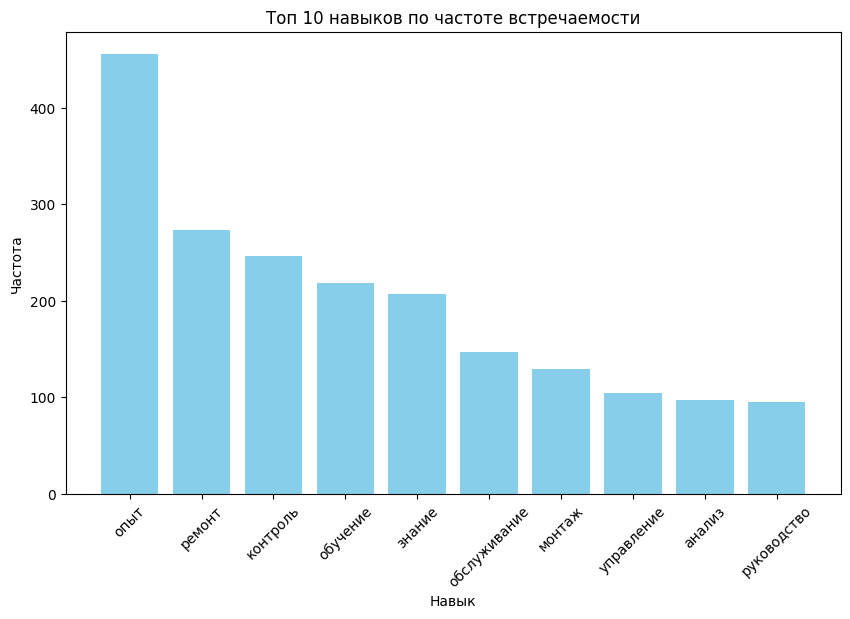

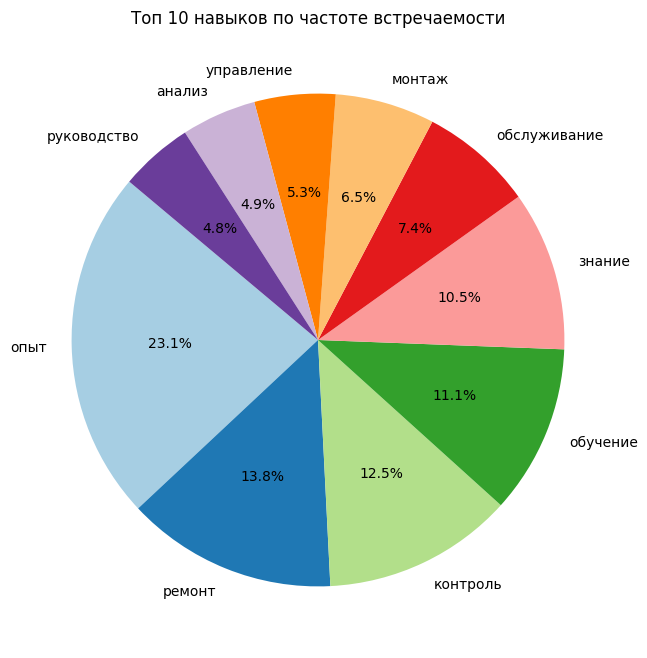

In [159]:
import matplotlib.pyplot as plt

# Extract top 10 skills based on Frequency
top_10_skills = skills_freq_table.nlargest(10, 'Frequency')

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(top_10_skills['Skill'], top_10_skills['Frequency'], color='skyblue')
plt.xlabel('Навык')
plt.ylabel('Частота')
plt.title('Топ 10 навыков по частоте встречаемости')
plt.xticks(rotation=45)
plt.show()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_skills['Frequency'], labels=top_10_skills['Skill'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Топ 10 навыков по частоте встречаемости')
plt.show()

Было визуально представлено распределение навыков по частоте встречаемости с помощью гистограммы и круговой диаграммы. Можно заметить что чаще всего встречаются такие навыки: опыт, ремонт, контроль, обучение, знание, обслуживание, монтаж, управление, анализ, руководство.

# 6. Формулирование выводов, отчёт

## 6.1 Формулирование выводов и рекомендации

**Рекомендации по востребованным навыкам для работы в нефтегазовой отрасли**
    
Если вы планируете построить карьеру в нефтегазовой отрасли, стоит обратить внимание на наиболее востребованные навыки. Согласно анализу данных о частоте встречаемости различных навыков, можно выделить следующие ключевые компетенции:

- Опыт – Работодатели высоко ценят профессионалов с богатым опытом в отрасли. Практический опыт помогает быстрее адаптироваться к специфическим условиям работы.

- Ремонт – Навыки ремонта оборудования и техники являются критически важными. Умение быстро и эффективно устранять неисправности помогает минимизировать простои и поддерживать производственные процессы на высоком уровне.

- Контроль – Способность контролировать различные процессы и соблюдение стандартов качества являются неотъемлемыми элементами успешной работы.

- Обучение – Навыки обучения и передачи знаний важны для подготовки новых сотрудников и повышения квалификации текущих работников.

- Знание – Глубокие знания в области техники, технологий и процессов нефтегазовой отрасли помогут вам стать ценным специалистом.

- Обслуживание – Компетенции в области обслуживания оборудования необходимы для обеспечения его надежной и бесперебойной работы.

- Монтаж – Навыки монтажа и установки оборудования востребованы при проведении новых проектов и модернизации существующих объектов.

- Управление – Эффективное управление проектами и командами позволяет достигать поставленных целей в срок и с соблюдением бюджета.

- Анализ – Способность анализировать данные и принимать обоснованные решения на их основе играет важную роль в оптимизации производственных процессов.

- Руководство – Лидерские качества и умение руководить коллективом способствуют успешной реализации проектов и поддержанию командного духа.

Развивая и совершенствуя эти навыки, вы повысите свои шансы на успешное трудоустройство и карьерный рост в нефтегазовой отрасли.

## 6.2 Отчёт

В ходе этого модуля была достигнута основная цель - определение групп навыков и их частота встречаемости, чтобы определить путь развития для тех, кто хочет устроиться в нефтегазовую отрась. Ход работы:
1. Выполнили парсинг данных для сбора информации с HH.ru
2. Сформировали структуру набора данных
3. Провели предварительную обработку данных
4. Выполнили построение и отбор числовых признаков
5. Выполнили семантический анализ текста
6. Провели визуальный анализ статистики навыков
7. Сделали рекомендации на основе визуальной статистики

Данный анализ в этом модуле помог лучше ознакомиться с нефтегазовой отраслью.